# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './0.data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
num_type = app_train.select_dtypes(include=["int64", "float64"]).apply(pd.Series.nunique, axis = 0)

In [37]:
sorted(num_type.index)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUME

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

(array([1.78916e+05, 1.12480e+05, 1.44110e+04, 1.26800e+03, 3.02000e+02,
        6.10000e+01, 2.20000e+01, 5.00000e+00, 3.30000e+01, 1.00000e+00]),
 array([  1615.5,  27256.5,  52897.5,  78538.5, 104179.5, 129820.5,
        155461.5, 181102.5, 206743.5, 232384.5, 258025.5]),
 <a list of 10 Patch objects>)

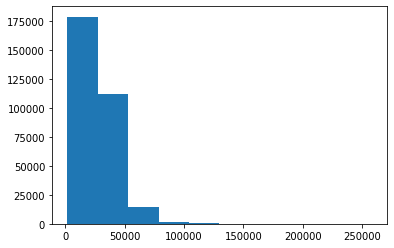

In [11]:
plt.hist(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

In [12]:
new_ann = app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']

In [16]:
cut2 = pd.cut(new_ann, 5)
cut2

0         (1359.09, 52897.5]
1         (1359.09, 52897.5]
2         (1359.09, 52897.5]
3         (1359.09, 52897.5]
4         (1359.09, 52897.5]
                 ...        
307506    (1359.09, 52897.5]
307507    (1359.09, 52897.5]
307508    (1359.09, 52897.5]
307509    (1359.09, 52897.5]
307510    (1359.09, 52897.5]
Name: AMT_ANNUITY, Length: 307499, dtype: category
Categories (5, interval[float64]): [(1359.09, 52897.5] < (52897.5, 104179.5] < (104179.5, 155461.5] < (155461.5, 206743.5] < (206743.5, 258025.5]]

In [20]:
cut2.value_counts()

(1359.09, 52897.5]      291408
(52897.5, 104179.5]      15667
(104179.5, 155461.5]       363
(206743.5, 258025.5]        34
(155461.5, 206743.5]        27
Name: AMT_ANNUITY, dtype: int64

In [21]:
cut3 = pd.qcut(new_ann, 5)

In [22]:
cut3.value_counts()

(21865.5, 28062.0]     61562
(1615.499, 14701.5]    61507
(14701.5, 21865.5]     61494
(37516.5, 258025.5]    61484
(28062.0, 37516.5]     61452
Name: AMT_ANNUITY, dtype: int64

c:\users\deali\.conda\envs\deep_learning\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\users\deali\.conda\envs\deep_learning\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\deali\.conda\envs\deep_learning\lib\site-packages\numpy\lib\histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


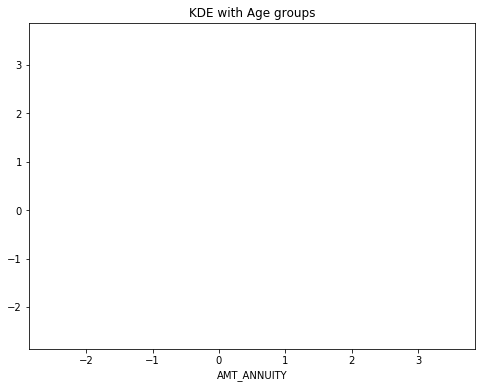

In [28]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
import seaborn as sns

ann_group_sorted = sorted(cut2.unique())

plt.figure(figsize=(8,6))
for i in range(len(ann_group_sorted)):
    sns.distplot(app_train.loc[(new_ann == ann_group_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_ANNUITY'], label = str(ann_group_sorted[i]))
    
    sns.distplot(app_train.loc[(new_ann == ann_group_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_ANNUITY'], label = str(ann_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [39]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
# 依照組別彙整年齡資料 "每一欄的平均值"
age_groups  = app_train.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
age_groups = pd.cut(app_train['DAYS_BIRTH'], )

In [42]:
age_years = app_train[(app_train['DAYS_BIRTH']/365)]['DAYS_BIRTH']

KeyError: "None of [Float64Index([ 25.92054794520548,  45.93150684931507,  52.18082191780822,\n               52.06849315068493, 54.608219178082194, 46.413698630136984,\n               37.74794520547945,  51.64383561643836,  55.06575342465754,\n               39.64109589041096,\n              ...\n               35.50958904109589,  44.00821917808219,  32.52054794520548,\n               45.76712328767123,   66.8054794520548, 25.553424657534247,\n              56.917808219178085,   41.0027397260274,  32.76986301369863,\n               46.18082191780822],\n             dtype='float64', length=307511)] are in the [columns]"